In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class OneparamModel(torch.nn.Module):
    def __init__(self, bias=False) -> None:
        super().__init__()
        self.l1 = torch.nn.Linear(1,1, bias=bias)
    
    def forward(self, x):
        return self.l1(x.reshape(-1,1))

loss_func = torch.nn.MSELoss()

def train_model(model, data, optimizer, N_steps=5000,loss_func=loss_func):
    loss_vals = []
    for step in range(N_steps):
        optimizer.zero_grad()
        loss = loss_func(model.forward(data[:,0]), data[:,1].reshape(-1,1))
        loss_vals.append(loss)
        loss.backward()
        optimizer.step()
    return loss_vals

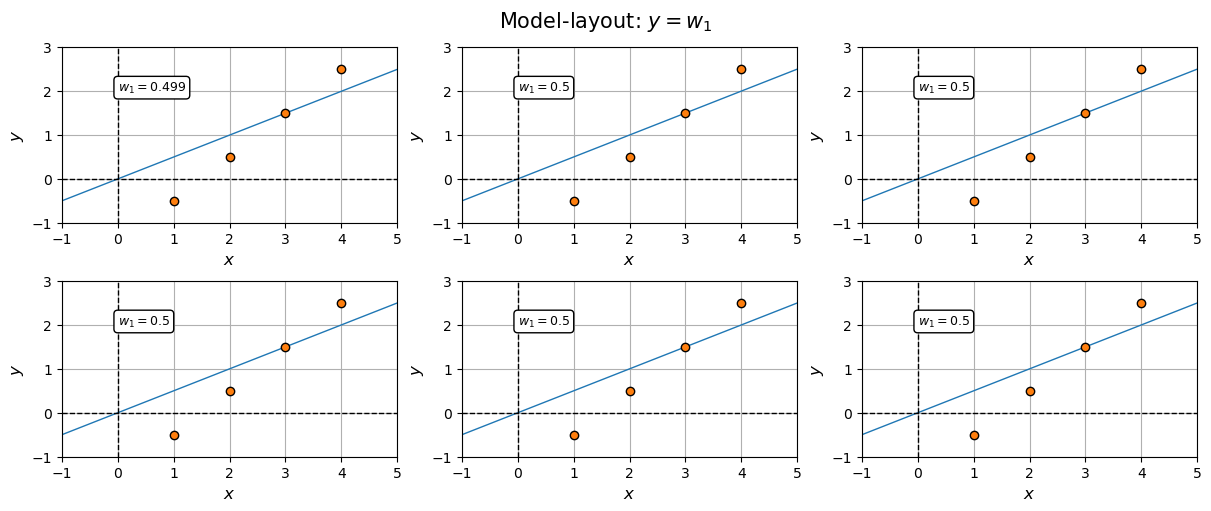

In [3]:
fig, axs = plt.subplots(2,3, figsize=(12,5), layout="constrained")
fig.suptitle(r"Model-layout: $y=w_1$",fontsize=15)
data = torch.tensor([[1,-0.5],[2,0.5],[3,1.5],[4,2.5]], requires_grad=True)
xs = torch.linspace(-1,5, 100)
for ax in axs.flatten():
    model = OneparamModel(bias=False)
    optimizer = torch.optim.Adam(params=model.parameters(), lr=0.01)
    train_model(model=model, data=data, optimizer=optimizer, N_steps=400) #Can get convergence with only 400 steps
    ys = model.forward(xs)
    with torch.no_grad():
        ax.plot(xs, ys, lw=1)
        ax.plot(data[:,0], data[:,1], 'o', markeredgecolor="k")
        ax.set_xlim([-1,5])
        ax.set_ylim([-1,3])
        ax.annotate(text=rf"$w_1=${round(model.l1.weight.item(),3)}", xy=(0.0, 2.0), fontsize=9, bbox=dict(boxstyle="round", fc="w"))
        ax.hlines(0, -1, 5, linestyles="--",color="k", lw=1)
        ax.vlines(0, -1, 3, linestyles="--",color="k",lw=1)
        ax.set_xlabel(r"$x$", fontsize=12)
        ax.set_ylabel(r"$y$", fontsize=12)
        ax.grid()

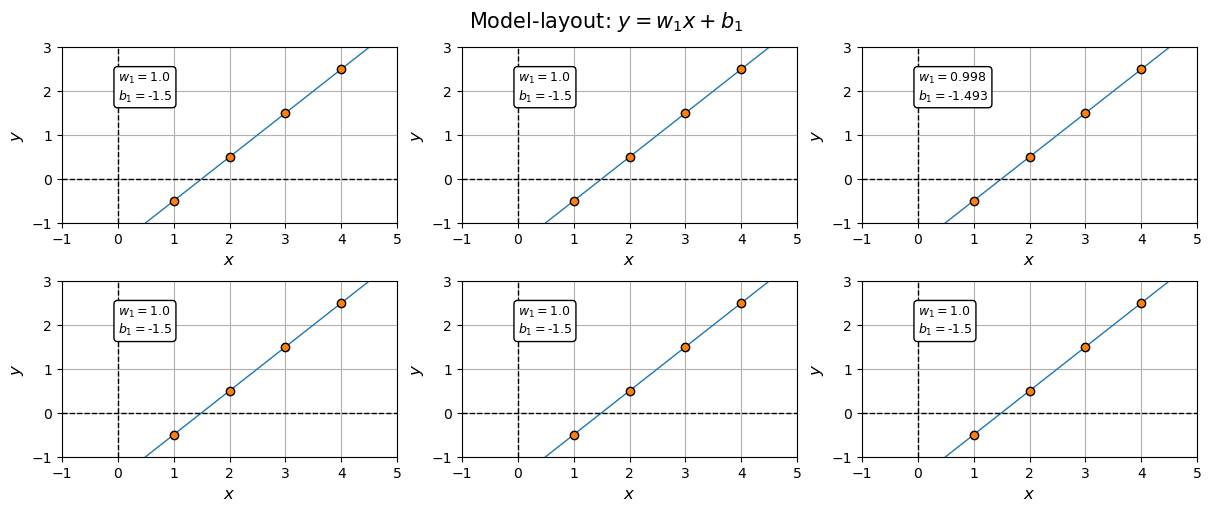

In [4]:
fig, axs = plt.subplots(2,3, figsize=(12,5), layout="constrained")
fig.suptitle(r"Model-layout: $y=w_1x+b_1$",fontsize=15)
data = torch.tensor([[1,-0.5],[2,0.5],[3,1.5],[4,2.5]], requires_grad=True)
xs = torch.linspace(-1,5, 100)
for ax in axs.flatten():
    model = OneparamModel(bias=True)
    optimizer = torch.optim.Adam(params=model.parameters(), lr=0.01)
    train_model(model=model, data=data, optimizer=optimizer, N_steps=2000)
    ys = model.forward(xs)
    with torch.no_grad():
        ax.plot(xs, ys, lw=1)
        ax.set_xlim([-1,5])
        ax.set_ylim([-1,3])
        ax.annotate(text=rf"$w_1=${round(model.l1.weight.item(),3)}"+"\n"+rf"$b_1=${round(model.l1.bias.item(),3)}", xy=(0.0, 1.8), fontsize=9, bbox=dict(boxstyle="round", fc="w"))
        ax.plot(data[:,0], data[:,1], 'o', markeredgecolor="k")
        ax.hlines(0, -1, 5, linestyles="--",color="k", lw=1)
        ax.vlines(0, -1, 3, linestyles="--",color="k",lw=1)
        ax.set_xlabel(r"$x$", fontsize=12)
        ax.set_ylabel(r"$y$", fontsize=12)
        ax.grid()

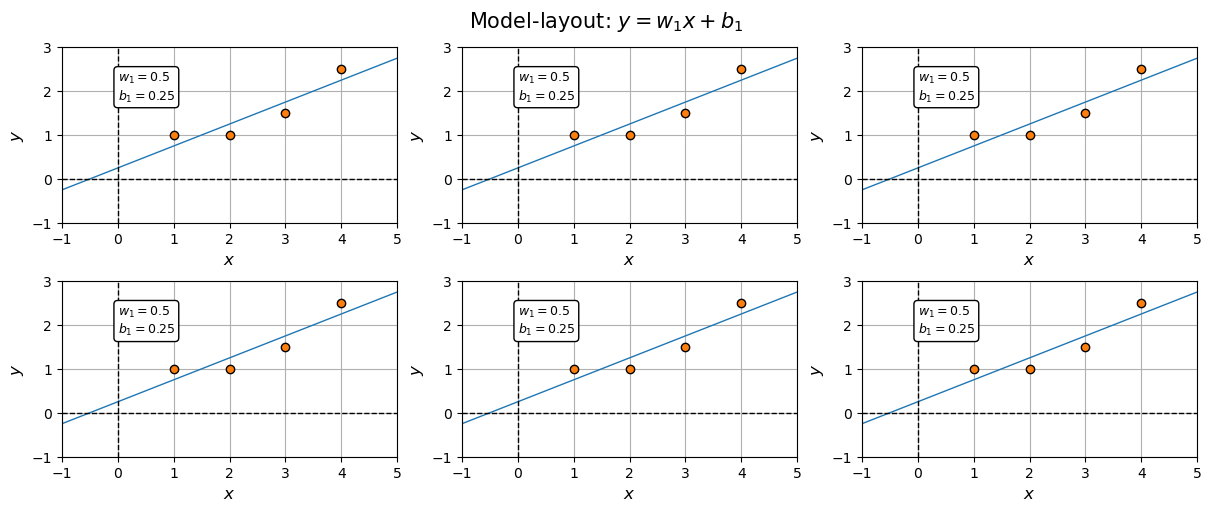

In [5]:
fig, axs = plt.subplots(2,3, figsize=(12,5), layout="constrained")
fig.suptitle(r"Model-layout: $y=w_1x+b_1$",fontsize=15)
data = torch.tensor([[1.0,1.0],[2.0,1.0],[3.0,1.5],[4.0,2.5]], requires_grad=True)
xs = torch.linspace(-1,5, 100)
for ax in axs.flatten():
    model = OneparamModel(bias=True)
    optimizer = torch.optim.Adam(params=model.parameters(), lr=0.01)
    train_model(model=model, data=data, optimizer=optimizer, N_steps=2000) 
    ys = model.forward(xs)
    with torch.no_grad():
        ax.plot(xs, ys, lw=1)
        ax.set_xlim([-1,5])
        ax.set_ylim([-1,3])
        ax.annotate(text=rf"$w_1=${round(model.l1.weight.item(),3)}"+"\n"+rf"$b_1=${round(model.l1.bias.item(),3)}", xy=(0.0, 1.8), fontsize=9, bbox=dict(boxstyle="round", fc="w"))
        ax.plot(data[:,0], data[:,1], 'o', markeredgecolor="k")
        ax.hlines(0, -1, 5, linestyles="--",color="k", lw=1)
        ax.vlines(0, -1, 3, linestyles="--",color="k",lw=1)
        ax.set_xlabel(r"$x$", fontsize=12)
        ax.set_ylabel(r"$y$", fontsize=12)
        ax.grid()

In [6]:
class OneparamRelU(OneparamModel):
    def __init__(self, bias=False) -> None:
        super().__init__(bias)
        self.reLU = torch.nn.ReLU()
    
    def forward(self, x):
        x = super().forward(x)
        return self.reLU(x)

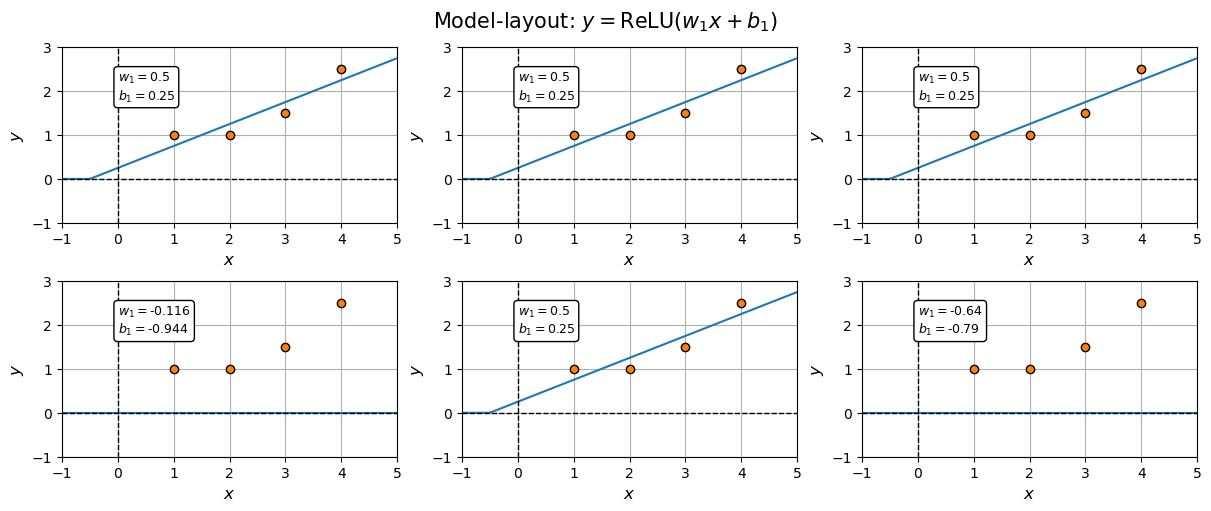

In [86]:
fig, axs = plt.subplots(2,3, figsize=(12,5), layout="constrained")
fig.suptitle(r"Model-layout: $y=$ReLU$(w_1x+b_1)$",fontsize=15)
data = torch.tensor([[1.0,1.0],[2.0,1.0],[3.0,1.5],[4.0,2.5]], requires_grad=True)
xs = torch.linspace(-1,5, 100)
for ax in axs.flatten():
    model = OneparamRelU(bias=True)
    optimizer = torch.optim.Adam(params=model.parameters(), lr=0.01)
    train_model(model=model, data=data, optimizer=optimizer, N_steps=1000) 
    ys = model.forward(xs)
    with torch.no_grad():
        ax.plot(xs, ys, lw=1.5)
        ax.set_xlim([-1,5])
        ax.set_ylim([-1,3])
        ax.annotate(text=rf"$w_1=${round(model.l1.weight.item(),3)}"+"\n"+rf"$b_1=${round(model.l1.bias.item(),3)}", xy=(0.0, 1.8), fontsize=9, bbox=dict(boxstyle="round", fc="w"))
        ax.plot(data[:,0], data[:,1], 'o', markeredgecolor="k")
        ax.hlines(0, -1, 5, linestyles="--",color="k", lw=1)
        ax.vlines(0, -1, 3, linestyles="--",color="k",lw=1)
        ax.set_xlabel(r"$x$", fontsize=12)
        ax.set_ylabel(r"$y$", fontsize=12)
        ax.grid()

In [7]:
class TwoLayerModel2Rel(torch.nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.layers = torch.nn.ParameterList([torch.nn.Linear(1,1, bias=True), torch.nn.Linear(1,1, bias=True)])
        self.RelU = torch.nn.ReLU()
    
    def forward(self, x):
        x = x.reshape(-1,1)
        for layer in self.layers:
            x = self.RelU(layer(x))
        return x
    
class TwoLayerModel1Rel(torch.nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.l1 = torch.nn.Linear(1,1, bias=True)
        self.l2 = torch.nn.Linear(1,1, bias=True)
        self.RelU = torch.nn.ReLU()
    
    def forward(self, x):
        x = x.reshape(-1,1)
        x = self.l1(x)
        return self.l2(self.RelU(x))

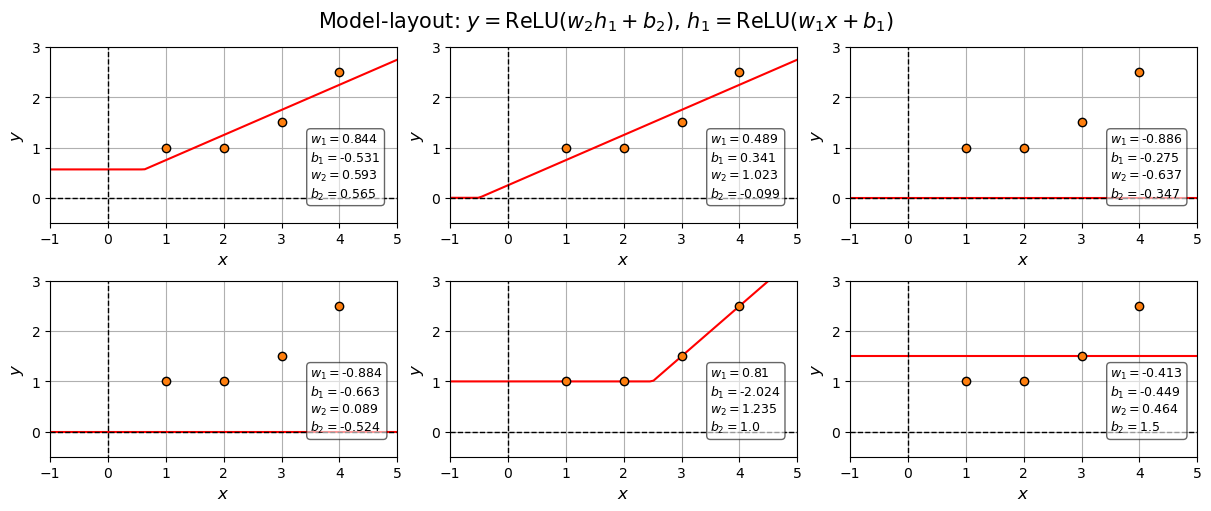

In [8]:
fig, axs = plt.subplots(2,3, figsize=(12,5), layout="constrained")
fig.suptitle(r"Model-layout: $y=$ReLU$(w_2h_1+b_2)$, $h_1=$ReLU$(w_1x+b_1)$",fontsize=15)
data = torch.tensor([[1.0,1.0],[2.0,1.0],[3.0,1.5],[4.0,2.5]], requires_grad=True)
xs = torch.linspace(-1,5, 100)
for ax in axs.flatten():
    model = TwoLayerModel2Rel()
    optimizer = torch.optim.Adam(params=model.parameters(), lr=0.01)
    train_model(model=model, data=data, optimizer=optimizer, N_steps=5000)
    label=""
    label+=rf"$w_{1}=${round(model.layers[0].weight.item(),3)}"+"\n"
    label+=rf"$b_{1}=${round(model.layers[0].bias.item(),3)}"+"\n"
    label+=rf"$w_{2}=${round(model.layers[1].weight.item(),3)}"+"\n"
    label+=rf"$b_{2}=${round(model.layers[1].bias.item(),3)}"
    ys = model.forward(xs)
    with torch.no_grad():
        ax.plot(xs, ys, lw=1.5, c="red")
        ax.set_xlim([-1,5])
        ax.set_ylim([-0.5,3])
        ax.annotate(text=label, xy=(3.5, 0.0), fontsize=9, bbox=dict(boxstyle="round", fc="w",alpha=0.6))
        ax.plot(data[:,0], data[:,1], 'o', markeredgecolor="k",c="C1")
        ax.hlines(0, -1, 5, linestyles="--",color="k", lw=1)
        ax.vlines(0, -1, 3, linestyles="--",color="k",lw=1)
        ax.set_xlabel(r"$x$", fontsize=12)
        ax.set_ylabel(r"$y$", fontsize=12)
        ax.grid()

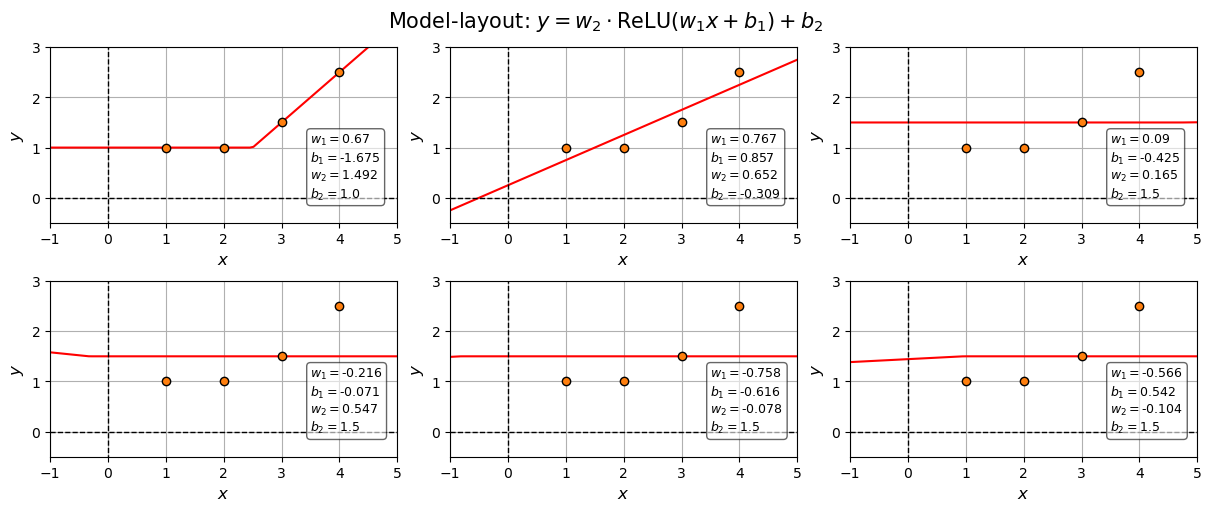

In [9]:
fig, axs = plt.subplots(2,3, figsize=(12,5), layout="constrained")
fig.suptitle(r"Model-layout: $y=w_2\cdot$ReLU$(w_1x+b_1) + b_2$",fontsize=15)
data = torch.tensor([[1.0,1.0],[2.0,1.0],[3.0,1.5],[4.0,2.5]], requires_grad=True)
xs = torch.linspace(-1,5, 100)
for ax in axs.flatten():
    model = TwoLayerModel1Rel()
    optimizer = torch.optim.Adam(params=model.parameters(), lr=0.01)
    train_model(model=model, data=data, optimizer=optimizer, N_steps=5000) 
    label=""
    label+=rf"$w_{1}=${round(model.l1.weight.item(),3)}"+"\n"
    label+=rf"$b_{1}=${round(model.l1.bias.item(),3)}"+"\n"
    label+=rf"$w_{2}=${round(model.l2.weight.item(),3)}"+"\n"
    label+=rf"$b_{2}=${round(model.l2.bias.item(),3)}"
    ys = model.forward(xs)
    with torch.no_grad():
        ax.plot(xs, ys, lw=1.5, c="red")
        ax.set_xlim([-1,5])
        ax.set_ylim([-0.5,3])
        ax.annotate(text=label, xy=(3.5, 0.0), fontsize=9, bbox=dict(boxstyle="round", fc="w",alpha=0.6))
        ax.plot(data[:,0], data[:,1], 'o', markeredgecolor="k",c="C1")
        ax.hlines(0, -1, 5, linestyles="--",color="k", lw=1)
        ax.vlines(0, -1, 3, linestyles="--",color="k",lw=1)
        ax.set_xlabel(r"$x$", fontsize=12)
        ax.set_ylabel(r"$y$", fontsize=12)
        ax.grid()

In [20]:
class BigModel(torch.nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.l1 = torch.nn.Linear(1,8, bias=True) #We have 8x1 matrix and 1x8 matrix for the layers
        self.l2 = torch.nn.Linear(8,1, bias=True)
        self.RelU = torch.nn.ReLU()
    
    def forward(self, x):
        x = x.reshape(-1,1)
        x = self.RelU(self.l1(x))
        return self.l2(x)

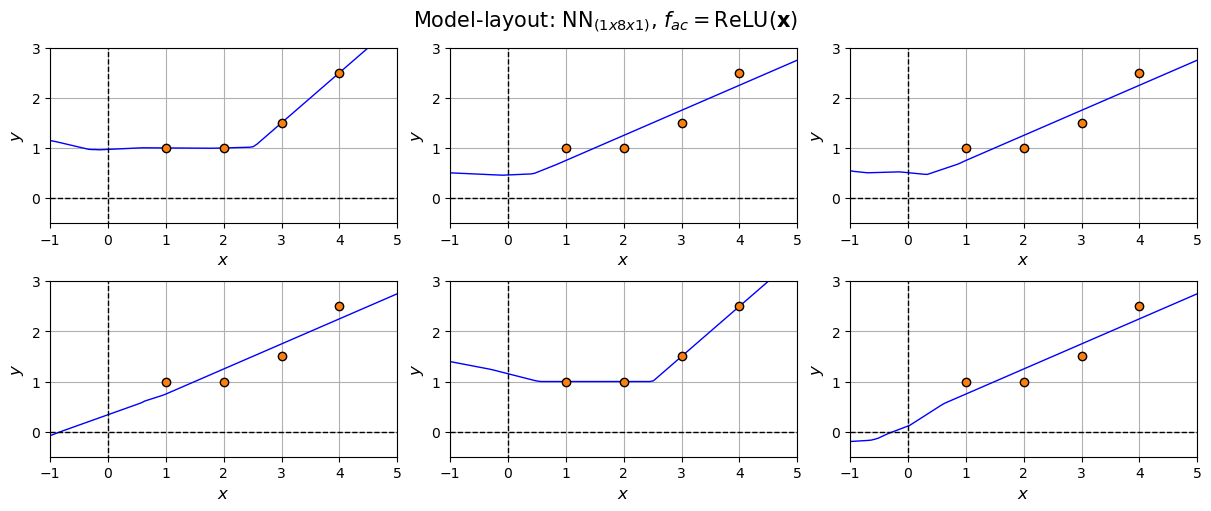

In [21]:
fig, axs = plt.subplots(2,3, figsize=(12,5), layout="constrained")
fig.suptitle(r"Model-layout: NN$_{(1x8x1)}$, $f_{ac}=$ReLU$(\bf{x}$$)$",fontsize=15)
xs = torch.linspace(-1,5, 100)
for ax in axs.flatten():
    model = BigModel()
    optimizer = torch.optim.Adam(params=model.parameters(), lr=1e-3)
    train_model(model=model, data=data, optimizer=optimizer, N_steps=10000) 
    ys = model.forward(xs)
    with torch.no_grad():
        ax.plot(xs, ys, lw=1, c="blue")
        ax.set_xlim([-1,5])
        ax.set_ylim([-0.5,3])
        ax.plot(data[:,0], data[:,1], 'o', markeredgecolor="k",c="C1")
        ax.hlines(0, -1, 5, linestyles="--",color="k", lw=1)
        ax.vlines(0, -1, 3, linestyles="--",color="k",lw=1)
        ax.set_xlabel(r"$x$", fontsize=12)
        ax.set_ylabel(r"$y$", fontsize=12)
        ax.grid()

In [18]:
class BigModel1(torch.nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.l1 = torch.nn.Linear(1,8, bias=True) #We have 8x1 matrix and 1x8 matrix for the layers
        self.l2 = torch.nn.Linear(8,8, bias=True)
        self.l3 = torch.nn.Linear(8,1, bias=True)
        self.RelU = torch.nn.ReLU()
    
    def forward(self, x):
        x = x.reshape(-1,1)
        x = self.l1(x)
        x = self.l2(x)
        return self.l3(x)

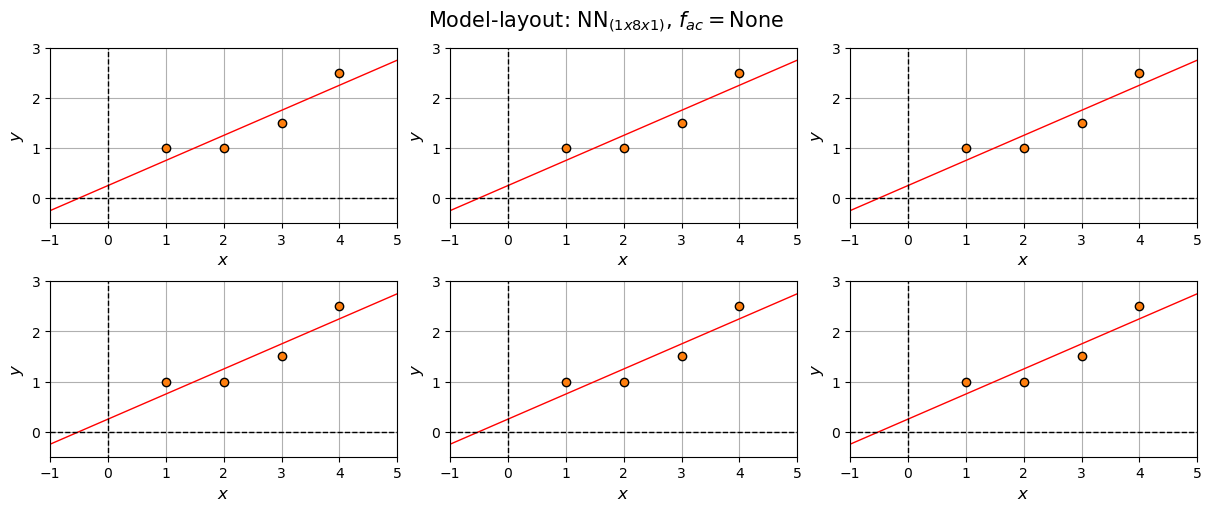

In [19]:
fig, axs = plt.subplots(2,3, figsize=(12,5), layout="constrained")
fig.suptitle(r"Model-layout: NN$_{(1x8x1)}$, $f_{ac}=$None",fontsize=15)
xs = torch.linspace(-1,5, 100)
for ax in axs.flatten():
    model = BigModel()
    optimizer = torch.optim.Adam(params=model.parameters(), lr=1e-3)
    train_model(model=model, data=data, optimizer=optimizer, N_steps=10000) 
    ys = model.forward(xs)
    with torch.no_grad():
        ax.plot(xs, ys, lw=1.0, c="red")
        ax.set_xlim([-1,5])
        ax.set_ylim([-0.5,3])
        ax.plot(data[:,0], data[:,1], 'o', markeredgecolor="k",c="C1")
        ax.hlines(0, -1, 5, linestyles="--",color="k", lw=1)
        ax.vlines(0, -1, 3, linestyles="--",color="k",lw=1)
        ax.set_xlabel(r"$x$", fontsize=12)
        ax.set_ylabel(r"$y$", fontsize=12)
        ax.grid()